In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
x = np.fromfile('bits_1kbaud.f32', dtype = 'float32')[500:]
x_diff = -x[1:]*x[:-1]

100

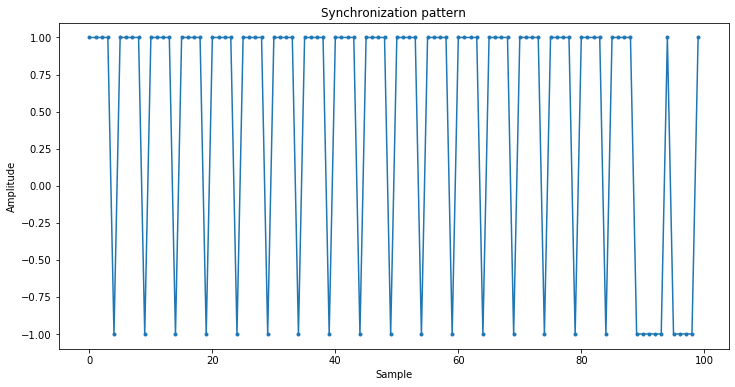

In [14]:
a_start = 49500
a_end = a_start + 1000
a = x_diff[a_start:a_end]
sync = np.sign(a[14:24+90])
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(sync, '.-')
plt.title('Synchronization pattern')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
sync.size

In [4]:
sync_corr = np.correlate(np.sign(x_diff), sync)/sync.size

Text(0, 0.5, 'Normalized correlation')

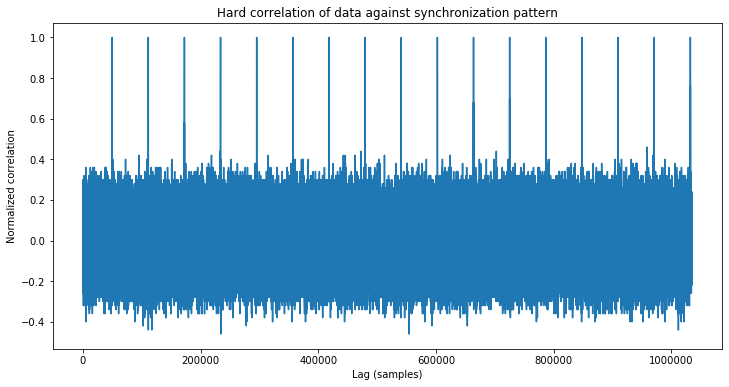

In [15]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(sync_corr)
plt.title('Hard correlation of data against synchronization pattern')
plt.xlabel('Lag (samples)')
plt.ylabel('Normalized correlation');

In [6]:
np.diff(np.where(sync_corr == 1)[0]), np.diff(np.where(sync_corr == 1)[0]).size

(array([61440, 61440, 61440, 61440, 61440, 61440, 61440, 61440, 61440,
        61440, 61440, 61440, 61440, 61440, 61440, 61440]), 16)

In [7]:
y = np.sign(x_diff[np.where(sync_corr == 1)[0][0]:])
framesize = 61440
y = y[:y.size//framesize*framesize].reshape((-1,framesize))

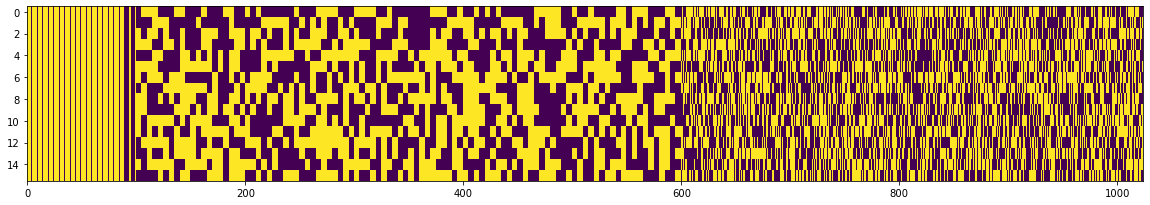

In [8]:
plt.figure(figsize = (20,20), facecolor = 'w')
plt.imshow(y[:,:1024], aspect = 10)

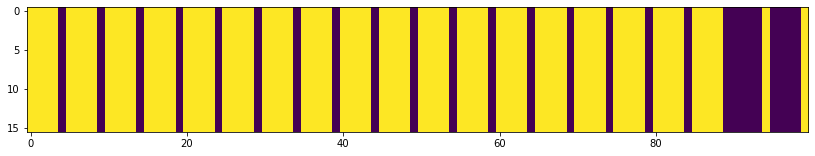

In [9]:
plt.figure(figsize = (14,14))
plt.imshow(y[:,:100], aspect = 1)

In [10]:
y[0,:100]

array([ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1.], dtype=float32)

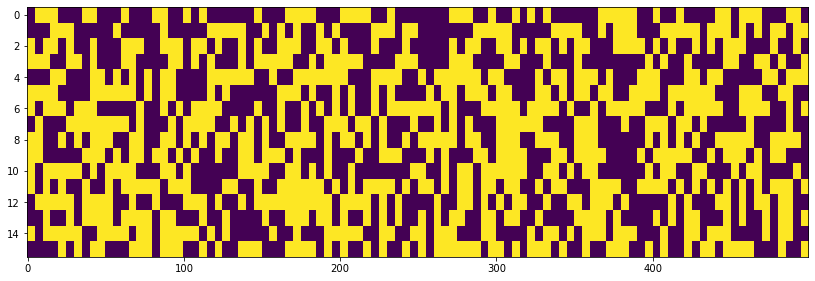

In [11]:
plt.figure(figsize = (14,14), facecolor = 'w')
plt.imshow(y[:,100:600], aspect = 10)

In [12]:
np.all(np.abs(np.average(y[:,100:600].reshape((-1,100,5)), axis = -1)) == 1)

True